<a href="https://colab.research.google.com/github/iIsunnyIi/PractisePro/blob/main/Prediction_Using_Decision_tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction Using Decision tree Algorithm

Task: For the given 'iris' dataset, create the decision tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier,it will be able to predict the right class accordingly.


### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Read the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
iris = pd.read_csv("Iris.csv")
iris.drop(["Id"],axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploring the data 

In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Visual Representation of Data

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


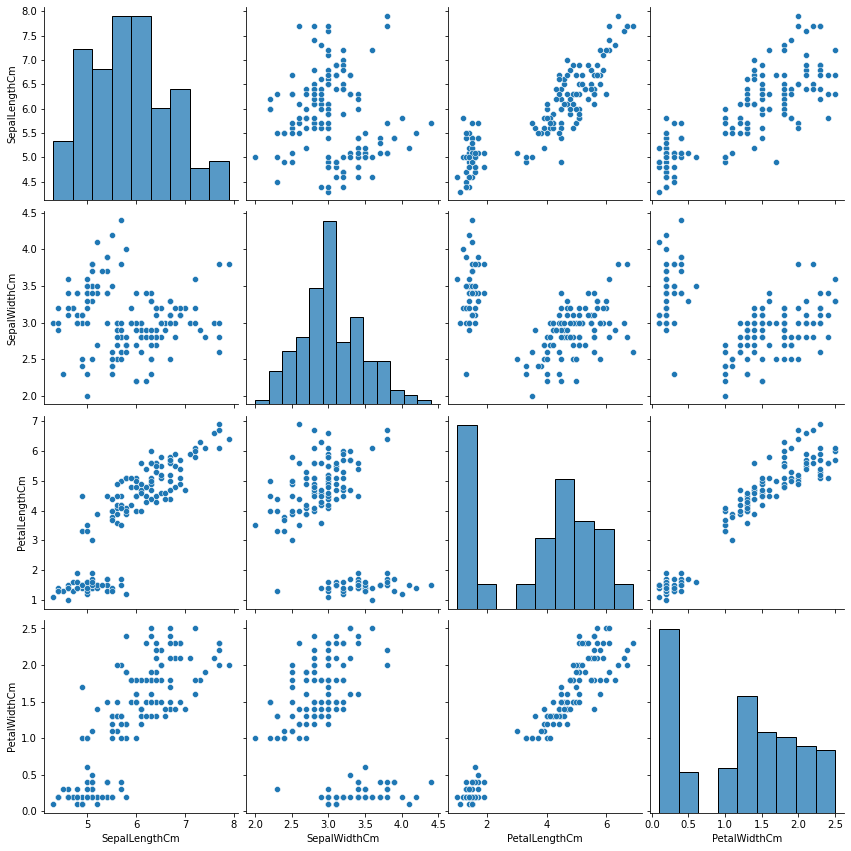

In [8]:
sns.pairplot(iris,size=3)
plt.show()

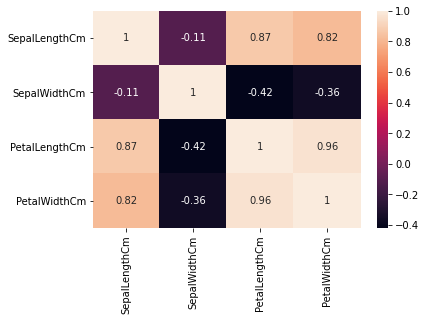

In [9]:
sns.heatmap(iris.corr(), annot=True)
plt.show();

### Split the dataset to train and test data

In [10]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Applying the decesion tree algorithm

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [14]:
X_test.shape, y_test.shape

((45, 4), (45,))

### Making predictions

In [15]:
predictions = dtree.predict(X_test)

### Evaluation metrics

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print("confusion_matrix :-\n",confusion_matrix(y_test,predictions))

print("\nclassification_report :- \n",classification_report(y_test,predictions))

confusion_matrix :-
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

classification_report :- 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Graphical representation of the decision tree


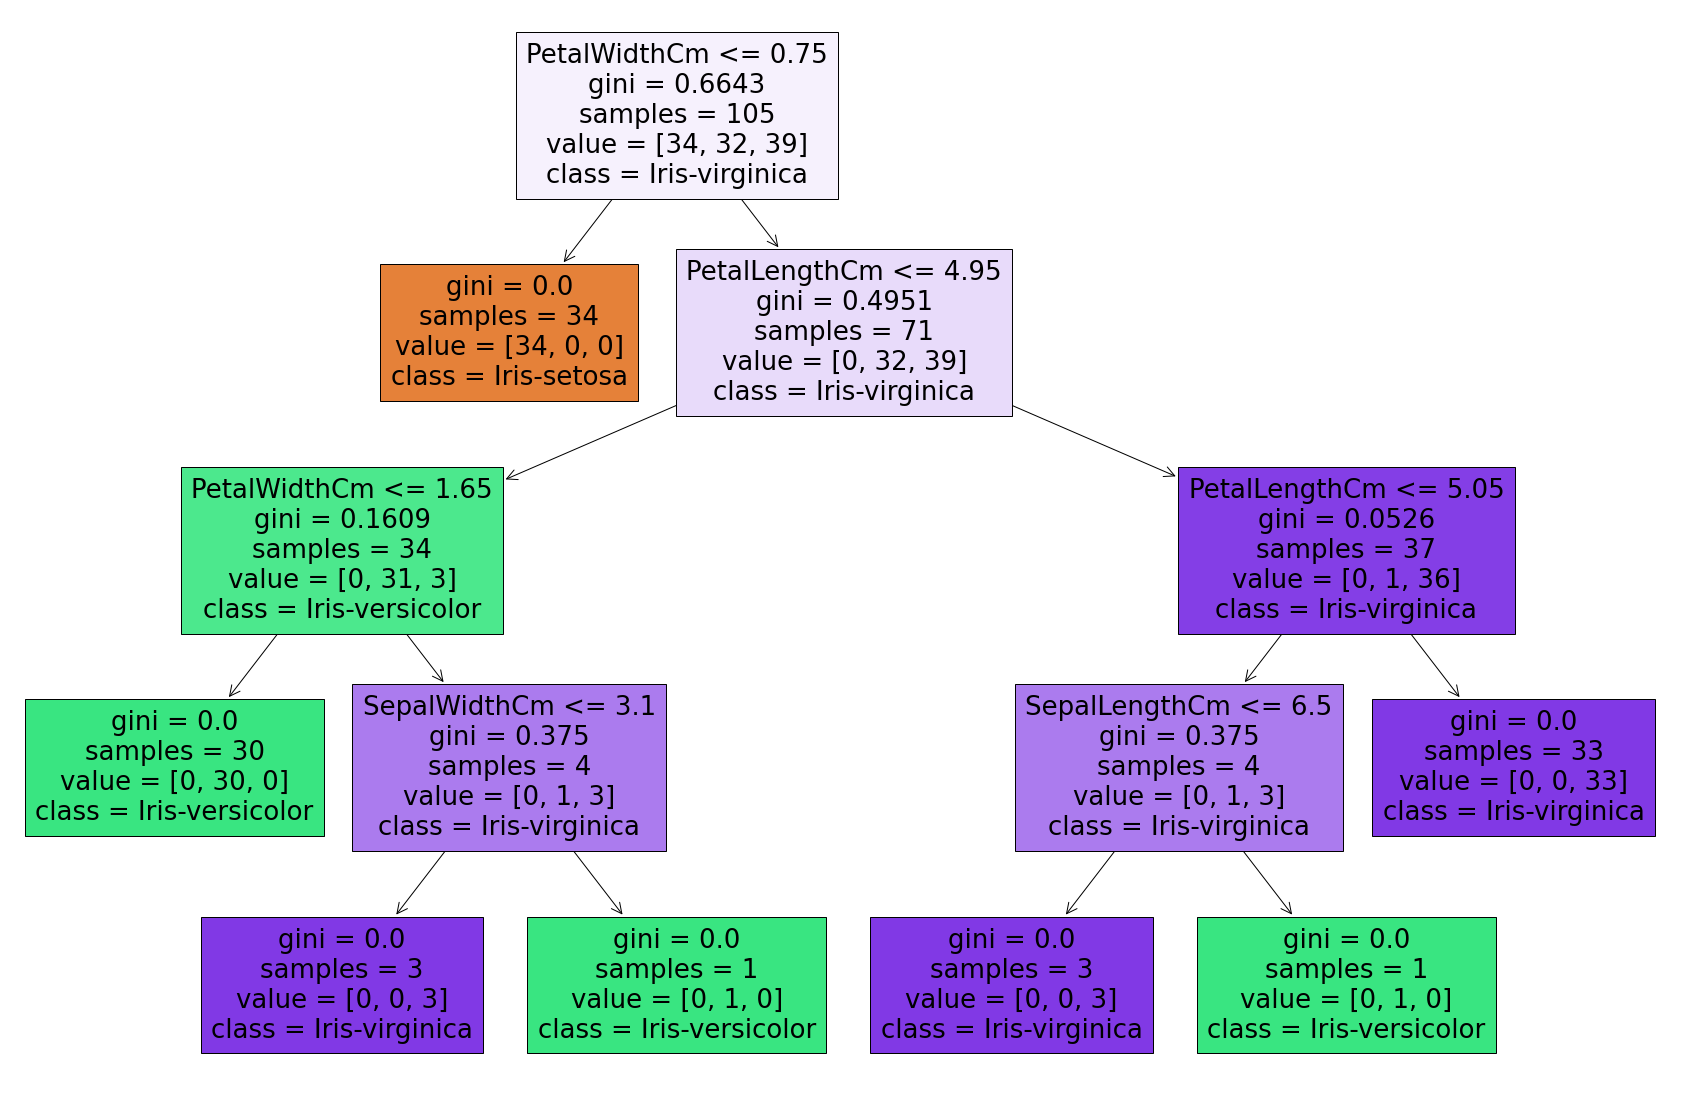

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))

tree_img= plot_tree(dtree,feature_names = iris.columns, class_names=iris['Species'].unique().tolist(), 
                    precision=4,label="all",filled=True)
plt.show()

## Thank You